# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1200.
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           1.15e-43
Time:                        19:21:40   Log-Likelihood:                 7.3136
No. Observations:                  50   AIC:                            -6.627
Df Residuals:                      46   BIC:                             1.021
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0701      0.074     68.253      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.6465191   5.10862058  5.53191685  5.88869617  6.16124781  6.3447719
  6.44816801  6.492573    6.50788827  6.52786704  6.58456883  6.70309214
  6.89745084  7.16827174  7.50269159  7.87647051  8.25797449  8.61337282
  8.91219631  9.13234335  9.26371115  9.30985552  9.28740677  9.22333729
  9.15053016  9.10237647  9.10728931  9.18403557  9.33865259  9.56345622
  9.83830334 10.1339013  10.41662062 10.65402023 10.82017741 10.89994687
 10.89144904 10.80637889 10.66808451 10.50773101 10.35918025 10.25342743
 10.2135086  10.25071598 10.36274264 10.53406152 10.73847651 10.94342636
 11.11533444 11.22512523]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.24697007 11.13624417 10.91288821 10.62234448 10.32443106 10.07869618
  9.92983884  9.89676487  9.96795812 10.10430007]


## Plot comparison

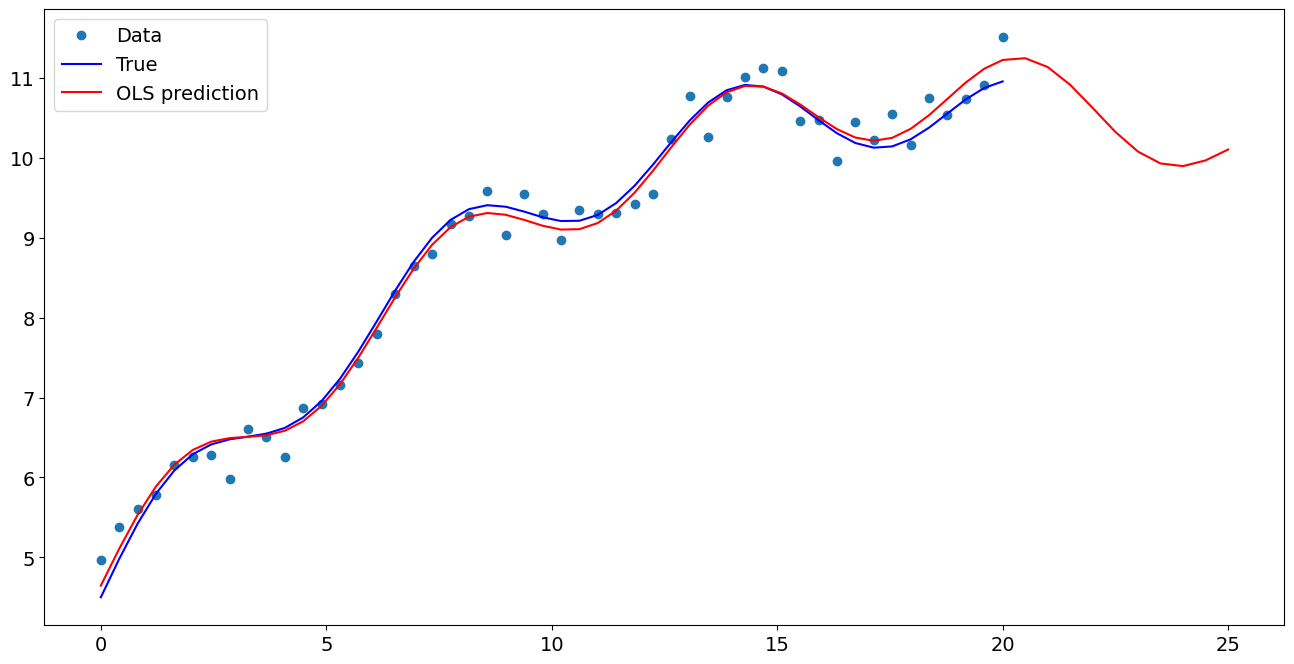

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.070101
x1                  0.475152
np.sin(x1)          0.508481
I((x1 - 5) ** 2)   -0.016943
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.246970
1    11.136244
2    10.912888
3    10.622344
4    10.324431
5    10.078696
6     9.929839
7     9.896765
8     9.967958
9    10.104300
dtype: float64